<a href="https://colab.research.google.com/github/Jaew00/Grad_PJT/blob/main/temp_grad_pjt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
meta_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/new_UrbanSound8K.csv')

In [ ]:
meta_df

,Unnamed: 0,slice_file_name,fsID,start,end,salience,fold,classID,class
0,0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
2,10,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn
3,11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn
4,12,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn
...,...,...,...,...,...,...,...,...,...
5353,8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
5354,8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
5355,8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
5356,8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
f1 = meta_df.query('fold == 1')

In [ ]:
f1

,Unnamed: 0,slice_file_name,fsID,start,end,salience,fold,classID,class
17,64,101415-3-0-2.wav,101415,1.000000,5.000000,1,1,3,dog_bark
18,65,101415-3-0-3.wav,101415,1.500000,5.500000,1,1,3,dog_bark
19,66,101415-3-0-8.wav,101415,4.000000,8.000000,1,1,3,dog_bark
25,105,102106-3-0-0.wav,102106,2.243852,3.884477,2,1,3,dog_bark
29,110,102842-3-0-1.wav,102842,0.500000,4.500000,2,1,3,dog_bark
...,...,...,...,...,...,...,...,...,...
5306,8631,98223-7-5-0.wav,98223,36.232035,38.457894,1,1,7,jackhammer
5307,8632,98223-7-6-0.wav,98223,41.178388,42.785953,1,1,7,jackhammer
5308,8633,98223-7-7-0.wav,98223,45.939253,48.165112,1,1,7,jackhammer
5309,8634,98223-7-8-0.wav,98223,49.772677,51.751218,1,1,7,jackhammer


In [ ]:
print(f1['class'].value_counts())

jackhammer       120
dog_bark         100
drilling         100
engine_idling     96
siren             86
car_horn          36
Name: class, dtype: int64


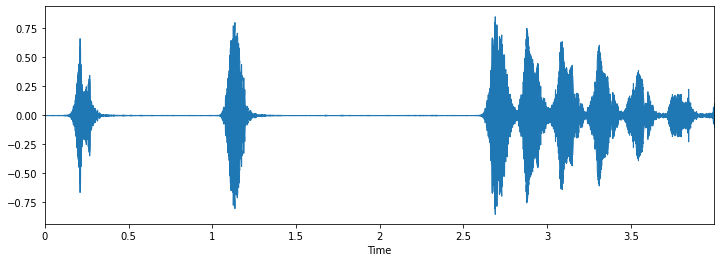

In [ ]:
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from scipy.io import wavfile as wav

filename = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1/101415-3-0-2.wav'
plt.figure(figsize = (12, 4))
data, sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data, sr = sample_rate)

In [ ]:
import librosa 
from scipy.io import wavfile as wav

import numpy as np
 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

Original sample rate: 48000
Librosa sample rate: 22050
(40, 173)


In [ ]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -27967 to 26427
Librosa audio file min~max range: -0.8539682 to 0.8048033


In [ ]:
import librosa 
import numpy as np
import pandas as pd
import os

max = 0

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        global max
        if mfccs.shape[1] > max:
            max = mfccs.shape[1]

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled
    
    
# 데이터셋 path 지정
fulldatasetpath = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1'

metadata = f1

features = []

# 각 소리에 대해 feature를 추출
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath)+'/'+str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# df로 만들기
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 
print('Max :',max)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


Finished feature extraction from  538  files
Max : 173


In [ ]:
mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 173)


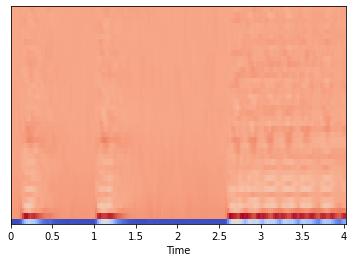

In [ ]:
import librosa.display
librosa.display.specshow(mfccs, sr = librosa_sample_rate, x_axis = 'time')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape

(430, 40)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy']
              , optimizer = 'adam')

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

num_epochs = 1000
num_batch_size = 32

# 얘 원래 있는 모델을 쓰는게 맞는지
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now() 
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
 1/14 [=>............................] - ETA: 9s - loss: 49.7421 - accuracy: 0.1875
Epoch 1: val_loss improved from inf to 8.03131, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_mlp.hdf5
14/14 [==============================] - 2s 85ms/step - loss: 32.2437 - accuracy: 0.2209 - val_loss: 8.0313 - val_accuracy: 0.4815
Epoch 2/1000
13/14 [==========================>...] - ETA: 0s - loss: 18.9946 - accuracy: 0.3798
Epoch 2: val_loss improved from 8.03131 to 2.70866, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_mlp.hdf5
14/14 [==============================] - 0s 11ms/step - loss: 18.6252 - accuracy: 0.3837 - val_loss: 2.7087 - val_accuracy: 0.5926
Epoch 3/1000
14/14 [==============================] - ETA: 0s - loss: 12.0586 - accuracy: 0.4279
Epoch 3: val_loss improved from 2.70866 to 2.63029, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_m

In [ ]:
# extract feature 함수 재정의
import numpy as np
max_pad_len = 1287
test_num = 0

def extract_features_cnn(file_name):
  try:
      audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
      mfccs = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc = 40)
      pad_width = max_pad_len - mfccs.shape[1]
      mfccs = np.pad(mfccs, pad_width = ((0, 0), (0, pad_width)), mode = 'constant')
      global max

      if mfccs.shape[1] > max:
        max = mfccs.shape[1]

  except Exception as e:
      print("Error 발생: ", file_name)
      return None
	
  return mfccs

In [ ]:
import pandas as pd
import os
import librosa

max = 0
fulldatasetpath = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1'
metadata = f1
features = []

for index, row in metadata.iterrows():
  file_name = os.path.join(os.path.abspath(fulldatasetpath) + '/' + str(row["slice_file_name"]))
    
  class_label = row['class']
  data = extract_features_cnn(file_name)
  features.append([data, class_label])

featuresdf = pd.DataFrame(features, columns = ['feature', 'class_label'])
print("Finished feature extraction from ", len(featuresdf), ' files')
print('Max :',max)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


Finished feature extraction from  538  files
Max : 1287


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

x = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size = 0.2, random_state = 42)

In [ ]:
num_rows = 40
num_columns = 1287
num_channels = 1

print("train data shape")
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)

train data shape
(430, 40, 1287)
(108, 40, 1287)

train data reshape 결과
(430, 40, 1287, 1)
(108, 40, 1287, 1)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

num_labels = yy.shape[1]
filter_size = 2

#CNN모델 구현
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, input_shape = (num_rows, num_columns, num_channels), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation = 'softmax'))


#컴파일
model.compile(loss = 'categorical_crossentropy'
				, metrics = ['accuracy']
                , optimizer = 'adam')
                
model.summary()
score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('Pre-training accuracy: %.4f%%' % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 1286, 16)      80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 643, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 643, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 642, 32)       2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 321, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 321, 32)        0

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

num_epochs = 10
num_batch_size = 32

# 얘 원래 있는 모델을 쓰는게 맞는지
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now() 
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('final accuracy: %.4f%%' % accuracy)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
14/14 [==============================] - ETA: 0s - loss: 1.6859 - accuracy: 0.2930
Epoch 1: val_loss improved from inf to 1.48380, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5
14/14 [==============================] - 17s 1s/step - loss: 1.6859 - accuracy: 0.2930 - val_loss: 1.4838 - val_accuracy: 0.4722
Epoch 2/10
14/14 [==============================] - ETA: 0s - loss: 1.2348 - accuracy: 0.5791
Epoch 2: val_loss improved from 1.48380 to 1.30426, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5
14/14 [==============================] - 15s 1s/step - loss: 1.2348 - accuracy: 0.5791 - val_loss: 1.3043 - val_accuracy: 0.5833
Epoch 3/10
14/14 [==============================] - ETA: 0s - loss: 0.9124 - accuracy: 0.6767
Epoch 3: val_loss improved from 1.30426 to 1.00629, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5
14/14 [================

In [ ]:
import librosa 
import numpy as np
import pandas as pd
import os

max = 0

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        global max
        if mfccs.shape[1] > max:
            max = mfccs.shape[1]

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled
    
    
# 데이터셋 path 지정
fulldatasetpath = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1'

metadata = f1

features = []

# 각 소리에 대해 feature를 추출
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath)+'/'+str(row["slice_file_name"]))
    
    class_label = row["classID"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# df로 만들기
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 
print('Max :',max)

Finished feature extraction from  538  files
Max : 173


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

x = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size = 0.2, random_state = 42)

In [ ]:
print("train data shape")
print(x_train.shape)
print(x_test.shape)

#x_train=x_train.reshape(2176,40,1)
x_train = np.reshape(x_train, (len(x_train), len(x_train[0]), -1))
x_test = np.reshape(x_test, (len(x_test), len(x_test[0]), -1))

#print(y_train.shape)
#print(y_test.shape)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)

train data shape
(430, 40)
(108, 40)

train data reshape 결과
(430, 40, 1)
(108, 40, 1)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import GRU, LSTM, Embedding               # RNN
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y_train.shape[1]

#LSTM 모델 구현
model = Sequential()    
model.add(LSTM(256,input_shape=(40,1),return_sequences=False))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
	#model.add(TimeDistributed(Dense(vocabulary)))
model.add(Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# Display model architecture summary 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)              

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

num_epochs = 10
num_batch_size = 32

# 얘 원래 있는 모델을 쓰는게 맞는지
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now() 
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
14/14 [==============================] - ETA: 0s - loss: 1.6375 - accuracy: 0.3140
Epoch 1: val_loss improved from inf to 1.48647, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5
14/14 [==============================] - 6s 233ms/step - loss: 1.6375 - accuracy: 0.3140 - val_loss: 1.4865 - val_accuracy: 0.4352
Epoch 2/10
14/14 [==============================] - ETA: 0s - loss: 1.3507 - accuracy: 0.5535
Epoch 2: val_loss improved from 1.48647 to 1.21344, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5
14/14 [==============================] - 2s 179ms/step - loss: 1.3507 - accuracy: 0.5535 - val_loss: 1.2134 - val_accuracy: 0.5463
Epoch 3/10
14/14 [==============================] - ETA: 0s - loss: 0.9963 - accuracy: 0.6302
Epoch 3: val_loss improved from 1.21344 to 1.07496, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5
14/14 [=========

In [ ]:
filename = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1/101415-3-0-2.wav'
#print_prediction(filename)

prediction_feature = extract_features_cnn(filename)
#print(prediction_feature.shape)

num_rows = 40
num_columns = 1287
num_channels = 1

prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)
print(prediction_feature.shape)


(1, 40, 1287, 1)


In [ ]:
num_rows = 40
num_columns = 1287
num_channels = 1

print("train data shape")
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)

In [ ]:
def print_prediction(file_name):
    num_rows = 40
    num_columns = 1287
    num_channels = 1

    prediction_feature = extract_features_cnn(file_name)
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)
 
    #print(prediction_feature.shape)
    
    y_prob = model.predict(prediction_feature)
    predicted_vector = np.argmax(y_prob, axis=1)
    predicted_class = le.inverse_transform(predicted_vector)
    print("The predicted class is:", predicted_vector, '\n') # predicted_class[0]

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [ ]:
filename = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1/102842-3-0-1.wav'
print_prediction(filename)

The predicted class is: [1] 



AttributeError: ignored

In [ ]:
filename = '../Evaluation audio/siren_1.wav'
print_prediction(filename) 